In [1]:
# They have the data but I think I have to do some scraping to get it
#
# It's honestly kind of frustrating. They obviously have a database. Why can't I just download the database?

# This is the place
# https://www.justice.gov/atr/antitrust-case-filings-alpha

# They also have something I could copy/paste and parse maybe
# If the only thing I care about is number per year
# I guess I'll start there
#

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from copy import deepcopy
from datetime import datetime, timedelta
from pprint import pprint


# Load data

In [3]:
cases_by_month = [
"June 2023 (2)",
"April 2023 (1)",
"March 2023 (1)",
"February 2023 (2)",
"January 2023 (5)",
"2023 (11)",
"November 2022 (4)",
"October 2022 (2)",
"September 2022 (2)",
"August 2022 (2)",
"July 2022 (3)",
"June 2022 (3)",
"May 2022 (3)",
"April 2022 (1)",
"March 2022 (6)",
"February 2022 (3)",
"January 2022 (1)",
"2026 (30)",
"December 2021 (2)",
"November 2021 (7)",
"October 2021 (5)",
"September 2021 (6)",
"August 2021 (3)",
"July 2021 (2)",
"June 2021 (5)",
"May 2021 (2)",
"April 2021 (1)",
"March 2021 (3)",
"January 2021 (4)",
"2021 (40)",
"December 2020 (3)",
"November 2020 (3)",
"October 2020 (6)",
"September 2020 (4)",
"August 2020 (2)",
"July 2020 (5)",
"June 2020 (3)",
"May 2020 (3)",
"April 2020 (4)",
"March 2020 (4)",
"February 2020 (8)",
"January 2020 (2)",
"2020 (47)",
"December 2019 (4)",
"October 2019 (5)",
"September 2019 (3)",
"August 2019 (4)",
"July 2019 (7)",
"June 2019 (8)",
"May 2019 (3)",
"April 2019 (3)",
"March 2019 (1)",
"February 2019 (3)",
"January 2019 (4)",
"2019 (45)",
"December 2018 (5)",
"November 2018 (4)",
"October 2018 (4)",
"September 2018 (1)",
"August 2018 (6)",
"June 2018 (4)",
"May 2018 (4)",
"April 2018 (8)",
"March 2018 (3)",
"February 2018 (3)",
"January 2018 (1)",
"2018 (43)",
"December 2017 (2)",
"November 2017 (4)",
"October 2017 (4)",
"September 2017 (2)",
"August 2017 (4)",
"July 2017 (2)",
"June 2017 (3)",
"May 2017 (2)",
"April 2017 (1)",
"March 2017 (3)",
"February 2017 (2)",
"January 2017 (5)",
"2017 (34)",
"December 2016 (10)",
"November 2016 (5)",
"October 2016 (4)",
"September 2016 (3)",
"August 2016 (8)",
"July 2016 (5)",
"June 2016 (8)",
"May 2016 (7)",
"April 2016 (5)",
"March 2016 (4)",
"February 2016 (6)",
"January 2016 (1)",
"2016 (66)",
"December 2015 (6)",
"November 2015 (3)",
"October 2015 (7)",
"September 2015 (9)",
"August 2015 (3)",
"July 2015 (3)",
"June 2015 (5)",
"May 2015 (9)",
"April 2015 (7)",
"March 2015 (6)",
"February 2015 (2)",
"January 2015 (5)",
"2015 (65)",
"December 2014 (11)",
"November 2014 (12)",
"October 2014 (7)",
"September 2014 (4)",
"August 2014 (3)",
"July 2014 (4)",
"June 2014 (6)",
"May 2014 (3)",
"April 2014 (4)",
"March 2014 (4)",
"February 2014 (8)",
"January 2014 (9)",
"2014 (75)",
"December 2013 (4)",
"November 2013 (7)",
"October 2013 (3)",
"September 2013 (20)",
"August 2013 (4)",
"July 2013 (6)",
"June 2013 (6)",
"May 2013 (5)",
"April 2013 (6)",
"March 2013 (4)",
"February 2013 (2)",
"January 2013 (2)",
"2013 (69)",
"December 2012 (3)",
"November 2012 (4)",
"October 2012 (6)",
"September 2012 (4)",
"August 2012 (7)",
"July 2012 (6)",
"June 2012 (6)",
"May 2012 (2)",
"April 2012 (11)",
"March 2012 (4)",
"February 2012 (9)",
"January 2012 (12)",
"2012 (74)",
"December 2011 (9)",
"November 2011 (4)",
"October 2011 (12)",
"September 2011 (26)",
"August 2011 (10)",
"July 2011 (7)",
"June 2011 (13)",
"May 2011 (7)",
"April 2011 (5)",
"March 2011 (7)",
"February 2011 (5)",
"January 2011 (6)",
"2011 (111)",
"December 2010 (8)",
"November 2010 (17)",
"October 2010 (7)",
"September 2010 (15)",
"August 2010 (6)",
"July 2010 (3)",
"June 2010 (4)",
"May 2010 (5)",
"April 2010 (5)",
"March 2010 (7)",
"February 2010 (9)",
"January 2010 (5)",
"2010 (91)",
"December 2009 (2)",
"November 2009 (3)",
"October 2009 (3)",
"September 2009 (5)",
"August 2009 (6)",
"July 2009 (3)",
"June 2009 (7)",
"May 2009 (6)",
"April 2009 (13)",
"March 2009 (4)",
"February 2009 (3)",
"January 2009 (7)",
"2009 (62)",
"December 2008 (9)",
"November 2008 (6)",
"October 2008 (9)",
"September 2008 (4)",
"August 2008 (3)",
"July 2008 (7)",
"June 2008 (11)",
"May 2008 (9)",
"April 2008 (6)",
"March 2008 (4)",
"February 2008 (3)",
"January 2008 (4)",
"2008 (75)",
"December 2007 (5)",
"November 2007 (9)",
"October 2007 (8)",
"September 2007 (2)",
"August 2007 (6)",
"July 2007 (4)",
"June 2007 (3)",
"May 2007 (7)",
"April 2007 (5)",
"March 2007 (2)",
"February 2007 (5)",
"2007 (56)",
"December 2006 (5)",
"November 2006 (4)",
"October 2006 (2)",
"September 2006 (8)",
"August 2006 (1)",
"July 2006 (2)",
"June 2006 (5)",
"May 2006 (2)",
"April 2006 (6)",
"March 2006 (12)",
"February 2006 (3)",
"January 2006 (4)",
"2006 (54)",
"December 2005 (8)",
"October 2005 (4)",
"September 2005 (4)",
"August 2005 (4)",
"July 2005 (2)",
"June 2005 (8)",
"May 2005 (7)",
"April 2005 (6)",
"March 2005 (3)",
"February 2005 (3)",
"January 2005 (3)",
"2005 (52)",
"December 2004 (3)",
"November 2004 (2)",
"October 2004 (5)",
"September 2004 (5)",
"August 2004 (5)",
"July 2004 (1)",
"June 2004 (3)",
"May 2004 (6)",
"April 2004 (4)",
"March 2004 (6)",
"February 2004 (12)",
"January 2004 (5)",
"2004 (57)",
"December 2003 (5)",
"November 2003 (3)",
"October 2003 (5)",
"September 2003 (15)",
"August 2003 (3)",
"July 2003 (3)",
"June 2003 (4)",
"April 2003 (4)",
"March 2003 (4)",
"February 2003 (3)",
"January 2003 (1)",
"2003 (50)",
"December 2002 (3)",
"November 2002 (6)",
"October 2002 (7)",
"September 2002 (10)",
"August 2002 (3)",
"July 2002 (3)",
"June 2002 (5)",
"May 2002 (5)",
"April 2002 (5)",
"March 2002 (5)",
"January 2002 (1)",
"2002 (53)",
"November 2001 (2)",
"October 2001 (5)",
"September 2001 (5)",
"August 2001 (6)",
"July 2001 (4)",
"June 2001 (6)",
"May 2001 (3)",
"April 2001 (5)",
"March 2001 (4)",
"February 2001 (3)",
"January 2001 (5)",
"2001 (48)",
"December 2000 (1)",
"November 2000 (4)",
"October 2000 (5)",
"September 2000 (5)",
"August 2000 (9)",
"July 2000 (9)",
"June 2000 (16)",
"May 2000 (17)",
"April 2000 (7)",
"March 2000 (6)",
"February 2000 (3)",
"January 2000 (5)",
"2000 (87)",
"December 1999 (5)",
"November 1999 (8)",
"October 1999 (3)",
"September 1999 (14)",
"August 1999 (3)",
"July 1999 (5)",
"June 1999 (15)",
"May 1999 (9)",
"April 1999 (6)",
"March 1999 (11)",
"February 1999 (3)",
"January 1999 (4)",
"1999 (86)",
"December 1998 (2)",
"November 1998 (10)",
"October 1998 (3)",
"September 1998 (31)",
"August 1998 (4)",
"July 1998 (5)",
"June 1998 (9)",
"May 1998 (5)",
"April 1998 (5)",
"March 1998 (7)",
"February 1998 (5)",
"1998 (86)",
"December 1997 (7)",
"November 1997 (3)",
"October 1997 (3)",
"September 1997 (12)",
"August 1997 (3)",
"July 1997 (8)",
"June 1997 (5)",
"May 1997 (4)",
"April 1997 (3)",
"March 1997 (2)",
"February 1997 (9)",
"January 1997 (7)",
"1997 (66)",
"December 1996 (1)",
"November 1996 (4)",
"October 1996 (5)",
"September 1996 (23)",
"August 1996 (10)",
"July 1996 (4)",
"June 1996 (11)",
"May 1996 (6)",
"April 1996 (9)",
"March 1996 (4)",
"February 1996 (6)",
"January 1996 (2)",
"1996 (85)",
"December 1995 (4)",
"November 1995 (2)",
"October 1995 (2)",
"September 1995 (23)",
"August 1995 (3)",
"July 1995 (2)",
"June 1995 (8)",
"May 1995 (2)",
"April 1995 (4)",
"March 1995 (2)",
"February 1995 (1)",
"January 1995 (2)",
"1995 (55)",
"December 1994 (9)",
"November 1994 (1)",
"October 1994 (2)",
"September 1994 (2)",
"August 1994 (5)",
"July 1994 (2)",
"June 1994 (3)",
"May 1994 (4)",
"April 1994 (2)",
"March 1994 (4)",
"February 1994 (3)",
"January 1994 (2)",
"1994 (39)",
"December 1993 (1)",
"September 1993 (1)",
"July 1993 (2)",
"June 1993 (1)",
"March 1993 (2)",
"February 1993 (4)",
"1993 (11)",
"December 1992 (1)",
"October 1992 (1)",
"September 1992 (3)",
"August 1992 (1)",
"July 1992 (1)",
"June 1992 (1)",
"May 1992 (1)",
"March 1992 (1)",
"February 1992 (2)",
"January 1992 (1)",
"1992 (13)",
"December 1991 (2)",
"November 1991 (1)",
"October 1991 (2)",
"July 1991 (2)",
"May 1991 (2)",
"March 1991 (2)",
"February 1991 (1)",
"January 1991 (6)",
"1991 (18)",
"December 1990 (2)",
"October 1990 (1)",
"August 1990 (2)",
"July 1990 (4)",
"May 1990 (2)",
"April 1990 (1)",
"March 1990 (1)",
"February 1990 (1)",
"January 1990 (2)",
"1990 (16)",
"December 1989 (1)",
"November 1989 (1)",
"June 1989 (2)",
"February 1989 (1)",
"January 1989 (1)",
"1989 (6)",
"November 1988 (2)",
"September 1988 (1)",
"July 1988 (1)",
"May 1988 (2)",
"April 1988 (2)",
"March 1988 (2)",
"1988 (10)",
"December 1987 (1)",
"November 1987 (1)",
"October 1987 (2)",
"June 1987 (8)",
"May 1987 (1)",
"April 1987 (1)",
"February 1987 (1)",
"January 1987 (1)",
"1987 (16)",
"December 1986 (1)",
"November 1986 (1)",
"August 1986 (2)",
"June 1986 (2)",
"February 1986 (3)",
"1986 (9)",
"November 1985 (1)",
"September 1985 (1)",
"August 1985 (2)",
"July 1985 (1)",
"June 1985 (1)",
"April 1985 (1)",
"January 1985 (2)",
"1985 (9)",
"December 1984 (1)",
"November 1984 (1)",
"October 1984 (1)",
"September 1984 (1)",
"August 1984 (2)",
"July 1984 (2)",
"May 1984 (3)",
"March 1984 (2)",
"February 1984 (1)",
"January 1984 (2)",
"1984 (16)",
"November 1983 (1)",
"August 1983 (1)",
"June 1983 (1)",
"May 1983 (2)",
"April 1983 (1)",
"February 1983 (1)",
"1983 (7)",
"November 1982 (1)",
"October 1982 (2)",
"August 1982 (1)",
"July 1982 (2)",
"June 1982 (4)",
"May 1982 (1)",
"April 1982 (3)",
"March 1982 (1)",
"February 1982 (4)",
"1982 (19)",
"December 1981 (2)",
"September 1981 (1)",
"August 1981 (1)",
"July 1981 (1)",
"February 1981 (7)",
"January 1981 (6)",
"1981 (18)",
"December 1980 (4)",
"November 1980 (1)",
"October 1980 (4)",
"September 1980 (8)",
"August 1980 (4)",
"July 1980 (2)",
"June 1980 (2)",
"May 1980 (2)",
"April 1980 (2)",
"January 1980 (4)",
"1980 (33)",
"December 1979 (3)",
"September 1979 (4)",
"August 1979 (6)",
"July 1979 (1)",
"June 1979 (4)",
"May 1979 (2)",
"April 1979 (2)",
"March 1979 (4)",
"January 1979 (4)",
"1979 (30)",
"December 1978 (1)",
"November 1978 (3)",
"October 1978 (1)",
"September 1978 (5)",
"August 1978 (4)",
"July 1978 (1)",
"June 1978 (1)",
"May 1978 (1)",
"April 1978 (2)",
"March 1978 (3)",
"1978 (22)",
"November 1977 (1)",
"October 1977 (2)",
"September 1977 (1)",
"August 1977 (1)",
"July 1977 (2)",
"June 1977 (1)",
"February 1977 (1)",
"1977 (9)",
"November 1976 (1)",
"June 1976 (8)",
"May 1976 (1)",
"April 1976 (4)",
"March 1976 (1)",
"February 1976 (3)",
"January 1976 (5)",
"1976 (23)",
"December 1975 (2)",
"November 1975 (6)",
"October 1975 (6)",
"September 1975 (1)",
"August 1975 (3)",
"July 1975 (1)",
"March 1975 (1)",
"1975 (20)",
"December 1974 (10)",
"November 1974 (4)",
"October 1974 (1)",
"September 1974 (2)",
"August 1974 (1)",
"July 1974 (1)",
"June 1974 (5)",
"May 1974 (2)",
"April 1974 (3)",
"March 1974 (1)",
"1974 (30)",
"December 1973 (3)",
"November 1973 (2)",
"October 1973 (2)",
"September 1973 (1)",
"August 1973 (5)",
"June 1973 (3)",
"May 1973 (5)",
"April 1973 (6)",
"March 1973 (1)",
"February 1973 (4)",
"January 1973 (3)",
"1973 (35)",
"December 1972 (8)",
"November 1972 (2)",
"October 1972 (2)",
"September 1972 (1)",
"August 1972 (3)",
"July 1972 (3)",
"June 1972 (15)",
"May 1972 (11)",
"April 1972 (10)",
"March 1972 (3)",
"February 1972 (3)",
"January 1972 (10)",
"1972 (71)",
"December 1971 (2)",
"November 1971 (2)",
"October 1971 (4)",
"September 1971 (3)",
"August 1971 (1)",
"July 1971 (3)",
"June 1971 (4)",
"May 1971 (11)",
"April 1971 (4)",
"March 1971 (1)",
"February 1971 (2)",
"January 1971 (3)",
"1971 (40)",
"December 1970 (6)",
"November 1970 (6)",
"September 1970 (3)",
"August 1970 (3)",
"July 1970 (7)",
"June 1970 (11)",
"May 1970 (4)",
"April 1970 (3)",
"March 1970 (6)",
"February 1970 (4)",
"1970 (53)",
"December 1969 (3)",
"September 1969 (1)",
"August 1969 (1)",
"July 1969 (4)",
"June 1969 (1)",
"April 1969 (2)",
"1969 (12)",
"November 1968 (1)",
"March 1968 (3)",
"January 1968 (2)",
"1968 (6)",
"November 1967 (5)",
"September 1967 (1)",
"1967 (6)",
"April 1966 (1)",
"1966 (1)",
"November 1965 (1)",
"September 1965 (1)",
"April 1965 (1)",
"1965 (3)",
"December 1964 (1)",
"October 1964 (1)",
"1964 (2)",
"June 1962 (1)",
"1962 (1)",
"November 1961 (1)",
"1961 (1)",
"October 1959 (1)",
"1959 (1)",
"October 1957 (1)",
"1957 (1)",
"May 1945 (1)",
"1945 (1)",
"May 1941 (1)",
"1941 (1)",
"August 1940 (1)",
"1940 (1)",
"February 1920 (1)",
"1920 (1)",
"May 1899 (1)",
"1899 (1)",
]
monthly_records = []
annual_records = []
for case_count in cases_by_month:
  data = case_count.split()
  if len(data) == 2:
    # there's a typo: they put 2026 instead of 2022 for some reason. idk how that even happens.
    if data[0] == '2026':
      data[0] = '2022'
    data[1] = data[1].replace('(', '').replace(')', '')
    annual_records.append((int(data[0]), int(data[1])))
    continue

  data[2] = data[2].replace('(', '').replace(')', '')
  monthly_records.append((data[0], int(data[1]), int(data[2])))


annual_records[:5]

[(2023, 11), (2022, 30), (2021, 40), (2020, 47), (2019, 45)]

# Explore and develop a viz

In [4]:
yr_df = pd.DataFrame.from_records(annual_records, columns=['year', 'cases'])
yr_df

,year,cases
0,2023,11
1,2022,30
2,2021,40
3,2020,47
4,2019,45
...,...,...
64,1945,1
65,1941,1
66,1940,1
67,1920,1


In [5]:
mn_df = pd.DataFrame.from_records(monthly_records, columns=['month', 'year', 'cases'])
mn_df

,month,year,cases
0,June,2023,2
1,April,2023,1
2,March,2023,1
3,February,2023,2
4,January,2023,5
...,...,...,...
564,May,1945,1
565,May,1941,1
566,August,1940,1
567,February,1920,1


In [6]:
# hopefully the monthly values match the annual values
# seems like it lines up okay. I could check but I'm sick of fighting pandas
monthly_sums = mn_df[['year', 'cases']].groupby('year').agg('sum')
monthly_sums

,cases
year,
1899,1
1920,1
1940,1
1941,1
1945,1
...,...
2019,45
2020,47
2021,40


In [7]:
px.bar(yr_df, x='year', y='cases')

In [8]:
# they look the same so that's good
px.bar(monthly_sums, y='cases')

In [9]:
mn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   569 non-null    object
 1   year    569 non-null    int64 
 2   cases   569 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.5+ KB


In [10]:
# Might be interesting to do it by president
# see whether there are statistically significant differences between presidental terms
# ughhhh then I have to look up presidents
# and I should probably do monthly counts
# so then I'll have 48 samples per terms instead of 4

month2int = {
  'January': 1,
  'February': 2,
  'March': 3,
  'April': 4,
  'May': 5,
  'June': 6,
  'July': 7,
  'August': 8,
  'September': 9,
  'October': 10,
  'November': 11,
  'December': 12
}

#
# there is a way to get daily data too but that would require some scraping
dts = []
for i, r in mn_df.iterrows():
  dts.append(datetime(year=r['year'], month=month2int[r['month']], day=28))

mn_df['date'] = dts
mn_df

,month,year,cases,date
0,June,2023,2,2023-06-28
1,April,2023,1,2023-04-28
2,March,2023,1,2023-03-28
3,February,2023,2,2023-02-28
4,January,2023,5,2023-01-28
...,...,...,...,...
564,May,1945,1,1945-05-28
565,May,1941,1,1941-05-28
566,August,1940,1,1940-08-28
567,February,1920,1,1920-02-28


In [11]:
px.bar(mn_df, x='date', y='cases')

In [12]:
# when do we get to > 1 case per year?
# 1964
mn_df.tail(15)

,month,year,cases,date
554,April,1966,1,1966-04-28
555,November,1965,1,1965-11-28
556,September,1965,1,1965-09-28
557,April,1965,1,1965-04-28
558,December,1964,1,1964-12-28
559,October,1964,1,1964-10-28
560,June,1962,1,1962-06-28
561,November,1961,1,1961-11-28
562,October,1959,1,1959-10-28
563,October,1957,1,1957-10-28


In [13]:
clipped_mn_df = mn_df.query('year >= 1964')
clipped_mn_df

,month,year,cases,date
0,June,2023,2,2023-06-28
1,April,2023,1,2023-04-28
2,March,2023,1,2023-03-28
3,February,2023,2,2023-02-28
4,January,2023,5,2023-01-28
...,...,...,...,...
555,November,1965,1,1965-11-28
556,September,1965,1,1965-09-28
557,April,1965,1,1965-04-28
558,December,1964,1,1964-12-28


In [14]:
# add 0s for months that are missing
# we cut off at 1964 but Johnson started in November of 1963
# There weren't any cases in 1963 so it's okay to start
# filling 0s from November of 1963
cur_yr = 1963
cur_mn = 11
new_rows = []

# pandas `in` is busted so we have to pull out the column manually
# and check against that
existing_dates = clipped_mn_df['date'].to_numpy(dtype=datetime)

# our data goes through the end of the previous month (june 2023)
# we're using 28 as the placeholder "day" for all the months
while cur_yr < 2023 or cur_mn <= 6:
  dt = datetime(year=cur_yr, month=cur_mn, day=28)
  if dt not in existing_dates:
    new_rows.append((dt.strftime('%B'), dt.year, 0, dt))

  if cur_mn == 12:
    cur_yr += 1
    cur_mn = 1
  else:
    cur_mn += 1


zero_rows = pd.DataFrame.from_records(new_rows, columns=['month', 'year', 'cases', 'date'])
clipped_mn_df = pd.concat([clipped_mn_df, zero_rows], ignore_index=True)
clipped_mn_df = clipped_mn_df.sort_values(by='date', ascending=False).reset_index(drop=True)
clipped_mn_df

,month,year,cases,date
0,June,2023,2,2023-06-28
1,May,2023,0,2023-05-28
2,April,2023,1,2023-04-28
3,March,2023,1,2023-03-28
4,February,2023,2,2023-02-28
...,...,...,...,...
711,March,1964,0,1964-03-28
712,February,1964,0,1964-02-28
713,January,1964,0,1964-01-28
714,December,1963,0,1963-12-28


In [15]:
# slightly better
px.bar(clipped_mn_df, x='date', y='cases')

In [16]:
# have to look up presidential terms ig
# looks like Lyndon B Johnson started at the end of 1963
# so I guess that's where we start
pres_records = [
  ('Lyndon B. Johnson', datetime(1963, 11, 22), datetime(1969, 1, 20)),
  ('Richard Nixon', datetime(1969, 1, 20), datetime(1974, 8, 9)),
  ('Gerald Ford', datetime(1974, 8, 9), datetime(1977, 1, 20)),
  ('Jimmy Carter', datetime(1977, 1, 20), datetime(1981, 1, 20)),
  ('Ronald Reagan', datetime(1981, 1, 20), datetime(1989, 1, 20)),
  ('George H. W. Bush', datetime(1989, 1, 20), datetime(1993, 1, 20)),
  ('Bill Clinton', datetime(1993, 1, 20), datetime(2001, 1, 20)),
  ('George W. Bush', datetime(2001, 1, 20), datetime(2009, 1, 20)),
  ('Barack Obama', datetime(2009, 1, 20), datetime(2017, 1, 20)),
  ('Donald Trump', datetime(2017, 1, 20), datetime(2021, 1, 20)),
  ('Joe Biden', datetime(2021, 1, 20), datetime(2023, 6, 28))  # cut Biden short so that it lines up with our last data point
]
pres_df = pd.DataFrame.from_records(pres_records, columns=['name', 'start', 'end'])
pres_df

,name,start,end
0,Lyndon B. Johnson,1963-11-22,1969-01-20
1,Richard Nixon,1969-01-20,1974-08-09
2,Gerald Ford,1974-08-09,1977-01-20
3,Jimmy Carter,1977-01-20,1981-01-20
4,Ronald Reagan,1981-01-20,1989-01-20
5,George H. W. Bush,1989-01-20,1993-01-20
6,Bill Clinton,1993-01-20,2001-01-20
7,George W. Bush,2001-01-20,2009-01-20
8,Barack Obama,2009-01-20,2017-01-20
9,Donald Trump,2017-01-20,2021-01-20


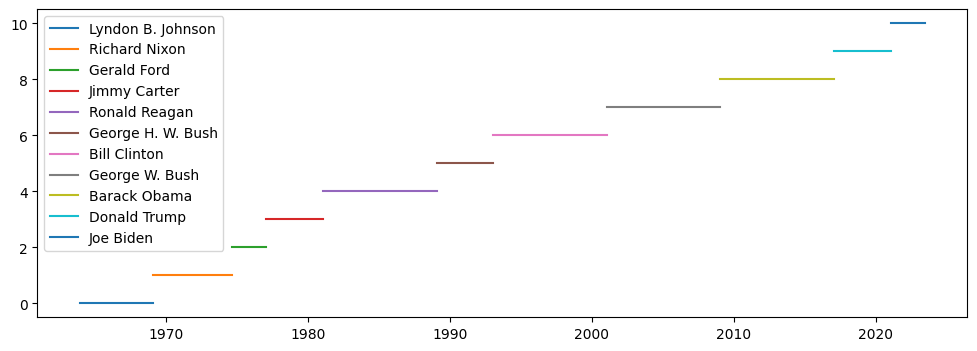

In [17]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
f.set_size_inches((12, 4))

for i, r in pres_df.iterrows():
  ax.plot([r[1], r[2]], [i, i], label=r[0])

ax.legend()

f.show()

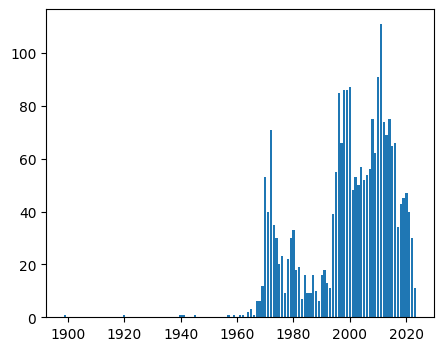

In [18]:
f, ax = plt.subplots()

f.set_size_inches((5,4))

#ax.bar(clipped_mn_df['date'], clipped_mn_df['cases'])
ax.bar(yr_df['year'], yr_df['cases'])

# this breaks the whole plot for some reason
# for i, r in pres_df.iterrows():
#   ax.plot([r[1], r[2]], [i/2, i/2], label=r[0])

f.show()

In [19]:
# add the mean & std for each president
presidents = []
for d in clipped_mn_df['date']:
  for i, r in pres_df.iterrows():
    if d >= r['start'] and d <= r['end']:
      presidents.append(str(r['name']))

clipped_mn_df['pres'] = presidents
tmp = clipped_mn_df[['cases', 'pres']].groupby('pres').agg(['mean', 'std']).reset_index(drop=False)
tmp.columns = ['name', 'cases_mean', 'cases_std']
tmp

pres_df = pd.merge(pres_df, tmp, on='name', how='inner')
pres_df

,name,start,end,cases_mean,cases_std
0,Lyndon B. Johnson,1963-11-22,1969-01-20,0.290323,0.817575
1,Richard Nixon,1969-01-20,1974-08-09,3.328358,3.187989
2,Gerald Ford,1974-08-09,1977-01-20,2.103448,2.663843
3,Jimmy Carter,1977-01-20,1981-01-20,1.958333,1.844582
4,Ronald Reagan,1981-01-20,1989-01-20,1.083333,1.433925
5,George H. W. Bush,1989-01-20,1993-01-20,1.104167,1.171280
6,Bill Clinton,1993-01-20,2001-01-20,5.364583,5.209545
7,George W. Bush,2001-01-20,2009-01-20,4.635417,2.753447
8,Barack Obama,2009-01-20,2017-01-20,6.385417,3.905111
9,Donald Trump,2017-01-20,2021-01-20,3.520833,1.879221


In [20]:
f = go.Figure()

f.add_trace(go.Bar(x=clipped_mn_df['date'], y=clipped_mn_df['cases'], name='Cases'))

for i, r in pres_df.iterrows():
  f.add_trace(go.Scatter(x=[r['start'], r['end']], y=[r['cases_mean'],r['cases_mean']], name=r['name']))


f.show()

In [21]:
# try to add some error bars by copying the Filled Lines section
# https://plotly.com/python/line-charts/
f = go.Figure()

f.add_trace(go.Bar(x=clipped_mn_df['date'], y=clipped_mn_df['cases'], name='Antitrust Cases'))
# the president lines don't show up if I do this one
# oh prolly b/c it's an int not a datetime
# f.add_trace(go.Bar(x=yr_df['year'], y=yr_df['cases'], name='Cases'))


for i, r in pres_df.iterrows():

  # std error region thing
  # right now it's pink b/c I haven't picked colors yet
  upper = r['cases_mean'] + r['cases_std'] / 2
  lower = r['cases_mean'] - r['cases_std'] / 2
  f.add_trace(go.Scatter(
    x = [r['start'], r['end'], r['end'], r['start']],
    y = [upper, upper, lower, lower],
    fill='toself',
    fillcolor='#facade',
    line_color='rgba(255,255,255,0)',
    showlegend=False
  ))

  # mean
  f.add_trace(go.Scatter(x=[r['start'], r['end']], y=[r['cases_mean'],r['cases_mean']], name=r['name']))

f.show()

In [22]:
# bootstrap confidence interval for each president
# since there's no way they're normal enough for std
import numpy as np

from scipy.stats import bootstrap

pres_names = pres_df['name'].unique()

president_cis = []
for pres in pres_names:
  cases = clipped_mn_df.query(f'pres == "{pres}"')['cases'].to_numpy()
  ci = bootstrap(
      cases.reshape(1,-1),
      np.mean,
      vectorized=False,
      confidence_level=0.95,
      method='BCa'  # "bias-corrected and accelerated" (shifts the CI bounds if the distribution is skewed)
  ).confidence_interval

  president_cis.append((pres, ci.low, ci.high))

ci_df = pd.DataFrame.from_records(president_cis, columns=['name', 'ci_low', 'ci_high'])
ci_df

# add the confidence intervals to pres_df
pres_df = pd.merge(pres_df, ci_df, on='name')
pres_df

,name,start,end,cases_mean,cases_std,ci_low,ci_high
0,Lyndon B. Johnson,1963-11-22,1969-01-20,0.290323,0.817575,0.145161,0.580645
1,Richard Nixon,1969-01-20,1974-08-09,3.328358,3.187989,2.656716,4.194030
2,Gerald Ford,1974-08-09,1977-01-20,2.103448,2.663843,1.310345,3.241379
3,Jimmy Carter,1977-01-20,1981-01-20,1.958333,1.844582,1.500000,2.520833
4,Ronald Reagan,1981-01-20,1989-01-20,1.083333,1.433925,0.843750,1.437500
5,George H. W. Bush,1989-01-20,1993-01-20,1.104167,1.171280,0.833333,1.500000
6,Bill Clinton,1993-01-20,2001-01-20,5.364583,5.209545,4.510417,6.583333
7,George W. Bush,2001-01-20,2009-01-20,4.635417,2.753447,4.125000,5.239583
8,Barack Obama,2009-01-20,2017-01-20,6.385417,3.905111,5.718750,7.312500
9,Donald Trump,2017-01-20,2021-01-20,3.520833,1.879221,3.041667,4.104167


In [23]:
f = go.Figure()

# add the bars
f.add_trace(go.Bar(x=clipped_mn_df['date'], y=clipped_mn_df['cases'], name='Antitrust Cases'))

# Add the president means + CI
for i, r in pres_df.iterrows():

  upper = r['ci_high']
  lower = r['ci_low']
  f.add_trace(go.Scatter(
    x = [r['start'], r['end'], r['end'], r['start']],
    y = [upper, upper, lower, lower],
    fill='toself',
    fillcolor='#facade',
    line_color='rgba(255,255,255,0)',
    showlegend=False
  ))

  # mean
  f.add_trace(go.Scatter(x=[r['start'], r['end']], y=[r['cases_mean'],r['cases_mean']], name=r['name']))

f.show()

# These are way narrower
#
# also, Clinton's mean is not in the middle of the CI for his mean
# kinda weird
# maybe that has to do with using "bias-corrected and accelerated" BCa in scipy?
# I'll try with the other methods
# yeah the mean is right in the center when I do "percentile" or "basic"
# so "BCa" is changing it
#
# https://blogs.sas.com/content/iml/2017/07/12/bootstrap-bca-interval.html
# actually that seems pretty reasonable
# It incorporates information about skew of the bootstrapped distribution
# It shifts the the CI bounds based on that skew
# So then the CI isn't centered on the mean
# Nice, that's actually pretty awesome

# Make the viz look decent

In [24]:
def hex2rgb(h):
  """
  '#FF44BB' -> 'rgb(255, 68, 187)'
  """
  if h[0] == '#':
    h = h[1:]
  if len(h) != 6:
    raise ValueError(f'malformed hex input')
  values = []
  for i in range(0, len(h), 2):
    values.append(int(h[i:i+2], base=16))
  return f'rgb({values[0]}, {values[1]}, {values[2]})'

hex2rgb('#FF44BB')

'rgb(255, 68, 187)'

In [25]:
def rgb2rgba(c, a=1.0):
  """
  'rgb(95, 70, 144)'
  ->
  'rgba(95, 70, 144)'
  ->
  'rgba(95, 70, 144, 1.0)

  defaults to 100% opacity
  but you can set it
  """
  c = c[:3] + 'a' + c[3:]
  c = c[:-1] + f', {a})'
  return c

rgb2rgba('rgb(255, 68, 187)')

'rgba(255, 68, 187, 1.0)'

In [26]:
# get rid of the plotly background
import plotly.io as pio
pio.templates.default = 'plotly_white'

MAX_HEIGHT = 16

f = go.Figure()

# add the bars
bar_color = '#bbbbbb'
f.add_trace(go.Bar(
    x=clipped_mn_df['date'],
    y=clipped_mn_df['cases'],
    name='DOJ Antitrust Cases',
    marker_color=bar_color,
    marker_line_color=bar_color,
    hovertemplate='%{x}: <b>%{y}</b><extra></extra>',
    hoverlabel={'bgcolor': rgb2rgba(hex2rgb(bar_color), 0.2)},
    legendrank=1000 + 1

))


# add hashing over any bars taller than MAX_HEIGHT
too_tall = clipped_mn_df[clipped_mn_df['cases'] > MAX_HEIGHT]['date']
f.add_trace(go.Bar(
    x=too_tall,
    y=[MAX_HEIGHT * 0.25] * len(too_tall),
    base = [MAX_HEIGHT - MAX_HEIGHT*0.1] * len(too_tall),
    marker_color='#fff',
    marker_line_color='rgba(255,255,255,0)',
    marker_line_width=0,
    width=3e9,
    # these are the options ['', '/', '\\', 'x', '-', '|', '+', '.']
    marker_pattern_shape='-',
    marker_pattern_fillmode='replace',
    showlegend=False
))

f.update_layout(barmode='stack')


# set colors for the presidents
# https://plotly.com/python/discrete-color/
# trying to avoid red and blue
# some of these are a list of hex values
# others are a list of strings that say 'rgb(x, x, x)'
# annoying
# pres_colors = px.colors.qualitative.Antique
# pres_colors = px.colors.qualitative.Alphabet
pres_colors = px.colors.qualitative.Prism


# Add the president means + CI
for i, r in pres_df.iterrows():
  pres_color = pres_colors[i]
  if pres_color[0] == '#':
    pres_color = hex2rgb(pres_color)

  ci_color = rgb2rgba(pres_color, 0.5)
  hover_color = rgb2rgba(pres_color, 0.2)

  hover_str = f"<b>{r['name']}</b><br>Mean: <b>{r['cases_mean']:.2f}</b><br>95% CI:<b>({r['ci_low']:.2f}–{r['ci_high']:.2f})</b><extra></extra>"


  # CI
  #
  # draw two lines like this
  #
  # o------------------o
  #
  # o------------------o
  #
  # make the lines transparent,
  # fill in the area between them
  upper = r['ci_high']
  lower = r['ci_low']
  f.add_trace(go.Scatter(
    x = [r['start'], r['end'], r['end'], r['start']],
    y = [upper, upper, lower, lower],
    fill='toself',
    #  fillcolor
    #     Sets the fill color. Defaults to a half-transparent
    #       variant of the line color, marker color, or marker line
    #       color, whichever is available.
    #
    fillcolor=ci_color,
    # make the lines transparent
    line_color=rgb2rgba(pres_color, 0),
    # I have to set `name` for it to show up when I hover over any part of the fill
    # otherwise the hover only comes up when I hover over the corners where the points are
    # but `name` doesn't do the <extra></extra> thing to remove the extra hover box
    name=hover_str.replace('<extra></extra>',''),
    showlegend=False,
    hovertemplate=hover_str,
    hoverlabel={'bgcolor': hover_color}
  ))

  # mean
  f.add_trace(go.Scatter(
    x=[r['start'], r['end']],
    y=[r['cases_mean'],r['cases_mean']],
    name=r['name'],
    line_color=pres_color,
    marker={'symbol': 'line-ns', 'line': {'width': 0, 'color':pres_color}},
    hovertemplate=hover_str,
    hoverlabel={'bgcolor': hover_color}
  ))

# zoom in a bit and chop off the top of a few bars
# so that we can see the president means better
f.update_yaxes(range=[0, MAX_HEIGHT], dtick=5)


# nudge the legend slightly closer to the plot
f.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=1.15
))

f.update_layout(title="What does it even look like")


f.show()

In [27]:
# I could make a box plot too
# get rid of the bars and just do a box plot comparing each distribution
# that would be the boring statistican way to do things

It looks like the big shift was right when Clinton started.
I'm sure there are all kinds of complicated reasons but I wonder whether that had anything to do with the DotCom bubble.

I don't think I'll find statisically significant difference of means between presidents except between H. W. Bush and Clinton.

I could also split the data into pre-Clinton and post-Clinton. I think there would be a significant difference of means there.

It looks like there was also a decent blip right after 9/11. They only brought 1 case over a period of 3 months.

I wonder what their funding has been over time.
Does that correlate at all?


In [28]:
# Maybe I should do it by Attorney General
# oh well
# next time, I guess
# wikipedia says the Assistant Attorney General runs the Antitrust division
# and the president appoints that person
# so
# president is probably good enough for now
# also president gives us 48 data points
# but I am interested

# woah they closed a bunch of field offices in January 2013
# I wonder if that explains the decline
# plus covid




#### Good Wikipedia article that lists the different things they go after and gives lots of example cases
https://en.wikipedia.org/wiki/United_States_antitrust_law